In [1]:
# I am using a mock dataset

In [17]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
Wearable = pd.read_excel('Data_Folder/Demo4_20/4_20_wearable_inside.xlsx',header=0,index_col=0)
Stationary = pd.read_excel('Data_Folder/Demo4_20/4_20_stationary.xlsx',header=0,index_col=False)
Weather = pd.read_csv('Data_Folder/Demo4_20/weather_4_20.txt',delimiter=',',header=None,index_col=False)
Weather.columns=['DTime','Bar','TempIn','HumIn','TempOut','Wind','Wind10','Wdir','HumOut','RainRate','UV','Solar']

In [19]:
Stationary.drop([0,554],inplace=True)

from datetime import datetime
Stationary = Stationary.resample('1T',on='Time').mean()

Wearable.index = range(Wearable.shape[0])
Wearable = Wearable.iloc[:556,:]

from datetime import datetime
for i in range(Weather.shape[0]):
    Weather.set_value(i, 'New_Time', datetime.strptime(Weather.iloc[i,0], '%Y-%m-%d %H:%M:%S'), takeable=False)
Weather = Weather.resample('1T', on='New_Time').mean()
Weather = Weather.iloc[632:1188]

Wearable.index = range(Wearable.shape[0])
Wearable.drop(columns=['Time(s)'],inplace=True)
Wearable.drop(Wearable.columns[0],axis=1,inplace=True)
Stationary.index = range(Stationary.shape[0])
#Stationary = Wea_Stat_Wearable.fillna(method='ffill')
Stationary = Stationary.fillna(method='ffill')
Wearable = Wearable.fillna(method='ffill')
#Wea_Stat = pd.concat([Weather, Stationary],axis=1)
#Wea_Stat


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


In [20]:
Weather.shape

(556, 11)

### Weather Model 

Epoch 1/100
444/444 [==============================] - 1s 1ms/step - loss: 3810809.2748
Epoch 2/100
444/444 [==============================] - 0s 306us/step - loss: 3791761.4302
Epoch 3/100
444/444 [==============================] - 0s 198us/step - loss: 3657077.0310
Epoch 4/100
444/444 [==============================] - 0s 226us/step - loss: 3128567.3590
Epoch 5/100
444/444 [==============================] - 0s 239us/step - loss: 2094323.8028
Epoch 6/100
444/444 [==============================] - 0s 194us/step - loss: 1195030.4696
Epoch 7/100
444/444 [==============================] - 0s 194us/step - loss: 791059.7498
Epoch 8/100
444/444 [==============================] - 0s 202us/step - loss: 594262.9360
Epoch 9/100
444/444 [==============================] - 0s 196us/step - loss: 477449.1863
Epoch 10/100
444/444 [==============================] - 0s 186us/step - loss: 414501.9592
Epoch 11/100
444/444 [==============================] - 0s 205us/step - loss: 376036.3604
Epoch 12/100
44

444/444 [==============================] - 0s 177us/step - loss: 237752.8163
Epoch 93/100
444/444 [==============================] - 0s 194us/step - loss: 237224.4927
Epoch 94/100
444/444 [==============================] - 0s 230us/step - loss: 238127.9712
Epoch 95/100
444/444 [==============================] - 0s 206us/step - loss: 236974.4819
Epoch 96/100
444/444 [==============================] - 0s 230us/step - loss: 237129.3912
Epoch 97/100
444/444 [==============================] - 0s 265us/step - loss: 238017.3695
Epoch 98/100
444/444 [==============================] - 0s 256us/step - loss: 241649.4769
Epoch 99/100
444/444 [==============================] - 0s 204us/step - loss: 238648.9670
Epoch 100/100
444/444 [==============================] - 0s 233us/step - loss: 238828.7498


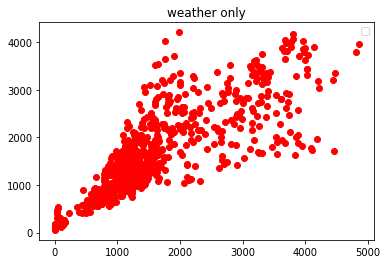

385269.264383165


In [21]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Weather, Wearable, test_size = 0.2, random_state = 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 11))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred_weather = model.predict(X_test)

plt.scatter(y_test,y_pred_weather, color = 'red')
plt.title('weather only')
plt.legend()
plt.show()
mse1 = mean_squared_error(y_test, y_pred_weather)
print mse1 

In [22]:
X_train.shape

(444, 11)

### Stationary Model 

Epoch 1/100
444/444 [==============================] - 1s 1ms/step - loss: 1439584.7438
Epoch 2/100
444/444 [==============================] - 0s 189us/step - loss: 47838.3008
Epoch 3/100
444/444 [==============================] - 0s 186us/step - loss: 14900.7236
Epoch 4/100
444/444 [==============================] - 0s 196us/step - loss: 13319.4259
Epoch 5/100
444/444 [==============================] - 0s 260us/step - loss: 10857.4934
Epoch 6/100
444/444 [==============================] - 0s 258us/step - loss: 8927.9743
Epoch 7/100
444/444 [==============================] - 0s 217us/step - loss: 8692.0814
Epoch 8/100
444/444 [==============================] - 0s 205us/step - loss: 7511.3092
Epoch 9/100
444/444 [==============================] - 0s 252us/step - loss: 7017.00410s - loss: 6085.86
Epoch 10/100
444/444 [==============================] - 0s 206us/step - loss: 6677.8049
Epoch 11/100
444/444 [==============================] - 0s 177us/step - loss: 6232.4053
Epoch 12/100
444/4

Epoch 94/100
444/444 [==============================] - 0s 470us/step - loss: 4794.5466
Epoch 95/100
444/444 [==============================] - 0s 549us/step - loss: 4986.1416
Epoch 96/100
444/444 [==============================] - 0s 470us/step - loss: 4379.5642
Epoch 97/100
444/444 [==============================] - 0s 679us/step - loss: 4899.7598
Epoch 98/100
444/444 [==============================] - 0s 676us/step - loss: 4366.5989
Epoch 99/100
444/444 [==============================] - 0s 345us/step - loss: 5135.9721
Epoch 100/100
444/444 [==============================] - 0s 212us/step - loss: 5097.7247


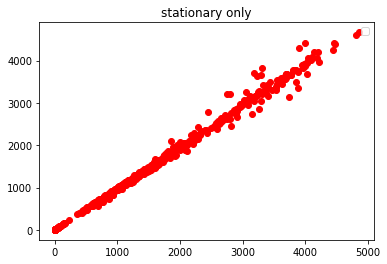

6581.5528053716125


In [23]:

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(Stationary, Wearable, test_size = 0.2, random_state = 0)
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Initialising the ANN
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(32, activation = 'relu', input_dim = 6))

# Adding the second hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(units = 32, activation = 'relu'))

# Adding the output layer

model.add(Dense(units = 6))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 10, epochs = 100)

y_pred_stationary = model.predict(X_test)

plt.scatter(y_test,y_pred_wearable, color = 'red')
plt.title('stationary only')
plt.legend()
plt.show()
mse2 = mean_squared_error(y_test, y_pred_stationary)
print mse2 

### Weighted Function
https://machinelearningmastery.com/ensemble-machine-learning-algorithms-python-scikit-learn/

In [27]:
y_pred_weather = pd.DataFrame(y_pred_weather)
y_pred_stationary = pd.DataFrame(y_pred_stationary)
Pred = pd.concat([y_pred_weather, y_pred_stationary],axis=1)


In [28]:
#Pred = [y_pred_weather,y_pred_wearable]
X_train, X_test, y_train, y_test = train_test_split(Pred, y_test, test_size = 0.2, random_state = 0)
classifier = Sequential()
# Adding the Single Perceptron or Shallow network
classifier.add(Dense(50,activation='relu', input_dim=12))
# Adding dropout to prevent overfitting
#classifier.add(Dropout(p=0.1))
# Adding the output layer
classifier.add(Dense(output_dim=6))
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = classifier.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size=10, nb_epoch=150)
y_pred = classifier.predict(X_test)
mse3 = mean_squared_error(y_test, y_pred)
print mse1 

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6)`
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 89 samples, validate on 23 samples
Epoch 1/150
89/89 [==============================] - 0s 5ms/step - loss: 2939443.7732 - val_loss: 1278099.3370
Epoch 2/150
89/89 [==============================] - 0s 244us/step - loss: 1720539.3062 - val_loss: 652419.2935
Epoch 3/150
89/89 [==============================] - 0s 254us/step - loss: 908296.9340 - val_loss: 273214.8030
Epoch 4/150
89/89 [==============================] - 0s 309us/step - loss: 419290.6138 - val_loss: 88349.4789
Epoch 5/150
89/89 [==============================] - 0s 213us/step - loss: 188560.9056 - val_loss: 37675.7481
Epoch 6/150
89/89 [==============================] - 0s 222us/step - loss: 114670.5794 - val_loss: 39509.0630
Epoch 7/150
89/89 [==============================] - 0s 266us/step - loss: 111930.9521 - val_loss: 45662.5812
Epoch 8/150
89/89 [==============================] - 0s 275us/step - loss: 99601.1392 - val_loss: 36782.9326
Epoch 9/150
89/89 [==============================] - 0s 257us/step - loss

89/89 [==============================] - 0s 197us/step - loss: 11777.4175 - val_loss: 13337.9826
Epoch 76/150
89/89 [==============================] - 0s 226us/step - loss: 11780.3903 - val_loss: 13731.9682
Epoch 77/150
89/89 [==============================] - 0s 189us/step - loss: 11521.8902 - val_loss: 13250.4626
Epoch 78/150
89/89 [==============================] - 0s 245us/step - loss: 11539.3822 - val_loss: 13916.2327
Epoch 79/150
89/89 [==============================] - 0s 210us/step - loss: 11261.8787 - val_loss: 13752.0315
Epoch 80/150
89/89 [==============================] - 0s 201us/step - loss: 11264.8894 - val_loss: 13953.6892
Epoch 81/150
89/89 [==============================] - 0s 239us/step - loss: 11338.8047 - val_loss: 13767.6918
Epoch 82/150
89/89 [==============================] - 0s 251us/step - loss: 11172.4973 - val_loss: 13013.5948
Epoch 83/150
89/89 [==============================] - 0s 190us/step - loss: 11234.5663 - val_loss: 12809.5804
Epoch 84/150
89/89 [===

89/89 [==============================] - 0s 236us/step - loss: 8471.2466 - val_loss: 11323.4133
Epoch 150/150
89/89 [==============================] - 0s 194us/step - loss: 8208.0459 - val_loss: 10874.3249
385269.264383165


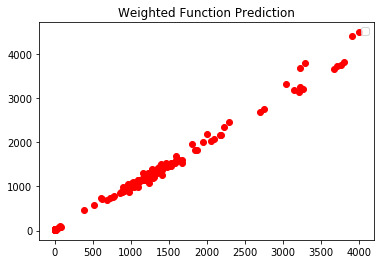

In [29]:
plt.scatter(y_test,y_pred, color = 'red')
plt.title('Weighted Function Prediction')
plt.legend()
plt.show()

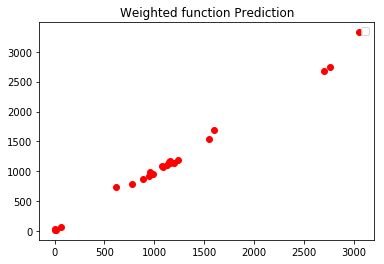

4739.857122011541


In [30]:
plt.scatter(y_test.iloc[:,1],y_pred[:,1], color = 'red')
plt.title('Weighted function Prediction')
plt.legend()
plt.show()
print mean_squared_error(y_test.iloc[:,1],y_pred[:,1])

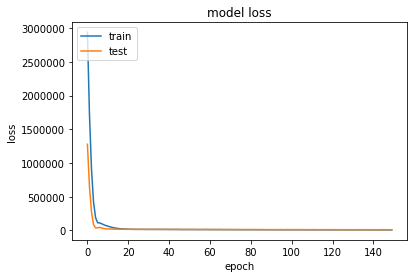

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [32]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Lasso,Ridge
ll = Lasso(alpha=0.1)
ll.fit(X_train, y_train)
pred2 = ll.predict(X_test)
mse2 = mean_squared_error(y_test,pred2)
print mse2

7821.495153113225


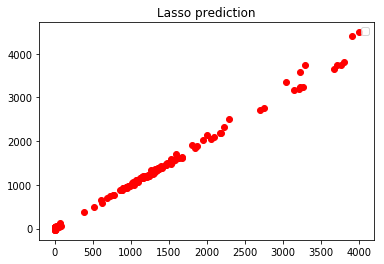

In [33]:
plt.scatter(y_test,pred2, color = 'red')
plt.title('Lasso prediction')
plt.legend()
plt.show()